#Imported required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

In [4]:
csv_path = 'extended_sales_transcripts.csv'
df = pd.read_csv(csv_path)

In [5]:
df.head()

,Transcript Text,Stage
0,Can you tell me more about your challenges?,Discovery
1,What issues are you currently facing with your...,Discovery
2,How are you currently managing lead tracking?,Discovery
3,We offer a solution that automates this process.,Pitch
4,Our platform helps reduce manual effort by 60%.,Pitch


In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Transcript Text    0
Stage              0
dtype: int64


In [7]:
X = df['Transcript Text']
y = df['Stage']

In [8]:
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = tfidf.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.25, random_state=42, stratify=y
)

In [10]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [11]:
acc = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_prob)

print(f" Accuracy: {acc:.4f}")
print(f" Log Loss: {loss:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.5000
 Log Loss: 1.3598

 Classification Report:
               precision    recall  f1-score   support

     Closing       0.00      0.00      0.00         1
   Discovery       1.00      1.00      1.00         1
   Objection       0.33      1.00      0.50         1
       Pitch       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.38         4
weighted avg       0.33      0.50      0.38         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


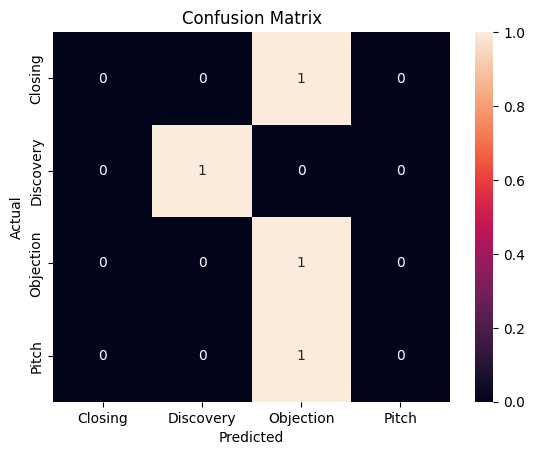

In [12]:
# Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
!pip install -q gradio

import gradio as gr

def predict_stage(text):
    text_vec = tfidf.transform([text])
    prediction = model.predict(text_vec)[0]
    return f"Predicted Stage: {prediction}"

demo = gr.Interface(
    fn=predict_stage,
    inputs=gr.Textbox(placeholder="Enter a sales line here..."),
    outputs="text",
    title="Sales Call Stage Classifier"
)

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2a5fcfa20ecc8caef2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
